## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import holidays
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:,.2f}'.format

## Data Preparation & Exploratory Data Analysis
Here we have weekly data from 3 different sources, we have mearged the 3 files to get the final dataset.

In [2]:
pd.read_csv("sales.csv").columns

Index(['GEO_UNIT', 'WEEK', 'GEO_LEVEL', 'CHANNEL', 'BRAND', 'SUB_BRAND',
       'FEATURE', 'VALUE'],
      dtype='object')

In [3]:
sales_df = pd.read_csv("sales.csv",usecols=['GEO_UNIT', 'WEEK', 'GEO_LEVEL', 'CHANNEL', 'BRAND', 'SUB_BRAND',
       'FEATURE', 'VALUE']) #sales data at week level for GEO_UNIT = FR (FRANCE)

In [4]:
sales_df['WEEK'].unique()

array(['7/1/2019', '14-01-2019', '21-01-2019', '28-01-2019', '4/2/2019',
       '11/2/2019', '18-02-2019', '25-02-2019', '4/3/2019', '11/3/2019',
       '18-03-2019', '25-03-2019', '1/4/2019', '8/4/2019', '15-04-2019',
       '22-04-2019', '29-04-2019', '6/5/2019', '27-06-2022', '4/7/2022',
       '11/7/2022', '18-07-2022', '25-07-2022', '1/8/2022', '8/8/2022',
       '15-08-2022', '22-08-2022', '29-08-2022', '5/9/2022', '12/9/2022',
       '19-09-2022', '26-09-2022', '3/10/2022', '10/10/2022',
       '17-10-2022', '24-10-2022', '31-10-2022', '7/11/2022',
       '14-11-2022', '21-11-2022', '28-11-2022', '5/12/2022',
       '12/12/2022', '19-12-2022', '13-05-2019', '20-05-2019',
       '27-05-2019', '3/6/2019', '10/6/2019', '17-06-2019', '24-06-2019',
       '1/7/2019', '8/7/2019', '15-07-2019', '22-07-2019', '29-07-2019',
       '5/8/2019', '12/8/2019', '19-08-2019', '26-08-2019', '2/9/2019',
       '9/9/2019', '16-09-2019', '23-09-2019', '30-09-2019', '7/10/2019',
       '14-10-2019',

#### Data Dictionary

    1.'GEO_UNIT'  - Geographical location / country of stores 
    2.'WEEK'      - Week for which sales value is captured 
    3.'GEO_LEVEL' - Country level or state level data 
    4.'CHANNEL'   - Retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores 
    5.'BRAND'     - The name of a product that is made by a particular company 
    6.'SUB_BRAND' - Secondary brand within its own brand 
    7.'FEATURE'   - Volume sales 
    8.'VALUE SALES'     - Sales value 
    9. 'VOLUME SALES'  -  Qty Sold

In [5]:
sales_df.head()

,GEO_UNIT,WEEK,GEO_LEVEL,CHANNEL,BRAND,SUB_BRAND,FEATURE,VALUE
0,FR,7/1/2019,FR,ENSEIGNES_HMSM,doritos,doritos,VOLUME_SALES,"40,650.00"
1,FR,7/1/2019,FR,ENSEIGNES_HMSM,doritos,doritos,VALUE_SALES,"404,800.00"
2,FR,7/1/2019,FR,ENSEIGNES_HMSM,doritos,doritos,VOLUME_SALES_SCALED,"72,926.10"
3,FR,7/1/2019,FR,ENSEIGNES_HMSM,doritos,doritos,VALUE_SALES_SCALED,"726,211.20"
4,FR,14-01-2019,FR,ENSEIGNES_HMSM,doritos,doritos,VOLUME_SALES,"41,420.00"


In [6]:
#convert datetime to date
sales_df['WEEK'] = pd.to_datetime(sales_df['WEEK']).dt.strftime('%Y-%m-%d')

In [7]:
sales_df = sales_df.pivot(index=['WEEK','BRAND','SUB_BRAND'],columns='FEATURE', values='VALUE').reset_index().rename_axis(None, axis=1)

In [8]:
trade_df = pd.read_csv("trade.csv") #Store level information ,clubbed at brand level

In [9]:
trade_df.head()

,GEO_UNIT,WEEK,CHANNEL,BRAND,SUB_BRAND,FEATURE,VALUE
0,FR,27-06-2022,ENSEIGNES_HMSM,doritos,doritos,AVG_PRICE_FOR_VOLUME,8.83
1,FR,27-06-2022,ENSEIGNES_HMSM,doritos,doritos,TOTAL_DISTRIBUTION_POINTS,990.00
2,FR,27-06-2022,ENSEIGNES_HMSM,doritos,doritos,WEIGHTED_DISTRIBUTION_FEATURE,30.00
3,FR,27-06-2022,ENSEIGNES_HMSM,doritos,doritos,WEIGHTED_DISTRIBUTION_DISPLAY,26.00
4,FR,27-06-2022,ENSEIGNES_HMSM,doritos,doritos,WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY,22.00


In [10]:
trade_df['FEATURE'].unique()

array(['AVG_PRICE_FOR_VOLUME', 'TOTAL_DISTRIBUTION_POINTS',
       'WEIGHTED_DISTRIBUTION_FEATURE', 'WEIGHTED_DISTRIBUTION_DISPLAY',
       'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY',
       'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME',
       'INTERNAL_COMPETITION_AVG_PRICE', 'AVG_PRICE_COMPETITOR',
       'INTERNAL_TDP_COMPETITION', 'TDP_COMPETITOR',
       'DORITOS_230G_AVG_PRICE', 'DORITOS_170G_AVG_PRICE',
       'DORITOS_230G_AVG_PRICE_REDUCTION',
       'DORITOS_170G_AVG_PRICE_REDUCTION'], dtype=object)

 #### Data Dictionary
    1.'GEO_UNIT'  - Geographical location / country of stores 
    2.'WEEK'      - Week for which sales value is captured 
    3.'GEO_LEVEL' - Country level or state level data 
    4.'CHANNEL'   - Retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores 
    5.'BRAND'     - The name of a product that is made by a particular company 
    6.'SUB_BRAND' - Secondary brand within its own brand 
    7. 'FEATURE'  - Conatins folowing price related features
        1.'AVG_PRICE_FOR_VOLUME'        - Average Price of the product 
        2.'TOTAL_DISTRIBUTION_POINTS'             - Total number of distribution stock point
        3.'WEIGHTED_DISTRIBUTION_FEATURE'        - In store promotion (buy 1 get 1)
        4.'WEIGHTED_DISTRIBUTION_DISPLAY'        - Position of product in the store
        5.'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY' - Captures both in store promotion and display
        6.'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME'       - Weighted distribution point based on store size 
        7.'INTERNAL_COMPETITION_AVG_PRICE'         - Avg price of internal compititor 
        8.'AVG_PRICE_COMPETITOR'                     - Avg price of compititor
        9.'INTERNAL_TDP_COMPETITION'               - Internal TDP of compititor
        10.'TDP_COMPETITOR'                         - TDP of compititor
        11.'DORITOS_230G_AVG_PRICE'  - Avg price of all the variants of 230gm
        12.'DORITOS_170G_AVG_PRICE' - Avg price of all the variants of 170gm
        13.'DORITOS_230G_AVG_PRICE_REDUCTION' -
        14.'DORITOS_170G_AVG_PRICE_REDUCTION' -

In [11]:
trade_df['WEEK'] = pd.to_datetime(trade_df['WEEK']).dt.strftime('%Y-%m-%d')

In [12]:
trade_df['WEEK'].value_counts()

2022-06-27    14
2021-06-28    14
2022-10-01    14
2022-01-17    14
2022-01-24    14
              ..
2020-11-16    14
2020-11-23    14
2020-11-30    14
2020-07-12    14
2019-12-23    14
Name: WEEK, Length: 209, dtype: int64

In [13]:
trade_df = trade_df.pivot(index=['WEEK','BRAND','SUB_BRAND'], columns='FEATURE', values='VALUE').reset_index().rename_axis(None, axis=1)

In [14]:
trade_df.head()

,WEEK,BRAND,SUB_BRAND,AVG_PRICE_COMPETITOR,AVG_PRICE_FOR_VOLUME,DORITOS_170G_AVG_PRICE,DORITOS_170G_AVG_PRICE_REDUCTION,DORITOS_230G_AVG_PRICE,DORITOS_230G_AVG_PRICE_REDUCTION,INTERNAL_COMPETITION_AVG_PRICE,INTERNAL_TDP_COMPETITION,TDP_COMPETITOR,TOTAL_DISTRIBUTION_POINTS,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,WEIGHTED_DISTRIBUTION_DISPLAY,WEIGHTED_DISTRIBUTION_FEATURE,WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY
0,2018-12-31,doritos,doritos,9.52,9.87,9.89,0.99,9.94,0.98,0.00,0.00,"2,327.00",757.00,62.00,4.00,0.00,0.00
1,2019-01-04,doritos,doritos,9.93,9.75,9.80,1.00,10.02,0.97,0.00,0.00,"2,383.00",767.00,64.93,8.00,10.00,5.00
2,2019-01-07,doritos,doritos,9.93,9.47,9.73,0.98,9.29,0.98,0.00,0.00,"2,825.00",786.00,59.73,9.00,2.00,1.00
3,2019-01-14,doritos,doritos,9.58,9.93,9.89,0.99,9.97,0.98,0.00,0.00,"2,293.00",723.00,65.66,5.00,4.00,2.00
4,2019-01-21,doritos,doritos,9.43,9.05,9.88,0.99,9.97,0.98,0.00,0.00,"2,290.00",790.00,57.23,20.00,29.00,19.00


In [15]:
trade_df['WEEK'].value_counts()

2018-12-31    1
2021-01-02    1
2021-07-26    1
2021-08-02    1
2021-08-03    1
             ..
2020-06-01    1
2020-06-04    1
2020-06-07    1
2020-06-15    1
2022-12-26    1
Name: WEEK, Length: 209, dtype: int64

In [16]:
media_df = pd.read_csv("media_spend.csv")  # Contains impressions and spend from marketing campaigns

In [17]:
media_df.head()

,WEEK,GEO_UNIT,CAMPAIGN_PLATFORM,MEDIA_SOURCE_SUB_BRAND_CODE,SUB_BRAND,CAMPAIGN,CAMPAIGN_JOIN,IMPRESSIONS,SPEND
0,26-07-2021,FR,YOUTUBE,doritos,doritos,Dipping,DIPPING,"9,934,153.00","27,289.09"
1,2/8/2021 0:00,FR,YOUTUBE,doritos,doritos,Dipping,DIPPING,"10,081,104.00","30,589.27"
2,9/8/2021 0:00,FR,YOUTUBE,doritos,doritos,Dipping,DIPPING,"10,249,981.00","30,692.11"
3,16-08-2021,FR,YOUTUBE,doritos,doritos,Dipping,DIPPING,"10,425,872.00","31,194.93"
4,6/12/2021 0:00,FR,YOUTUBE,doritos,doritos,Dipping,DIPPING,"6,430,291.00","21,552.05"


#### Data Dictionary

    1.'GEO_UNIT'          - Geographical location / country of stores 
    2.'WEEK'              - Week for which sales value is captured 
    3.'CAMPAIGN_PLATFORM' - Marketing platform on which the campaign was run
    4.'CAMPAIGN'          - Campaign Name
    5.'BRAND'             - The name of a product that is made by a particular company 
    6.'SUB_BRAND'         - Secondary brand within its own brand 
    7.'IMPRESSIONS'       - An impression is counted each time your ad is shown on a search result page or other site
    8.'SPEND'             - The amount of money allocated or invested in advertising, promotions, and other marketing activities to promote a product, service, or brand 

In [18]:
# convert to date from datetime if it exists
media_df['WEEK'] = pd.to_datetime(media_df['WEEK']).dt.strftime('%Y-%m-%d')

In [19]:
media_df['WEEK'].nunique()

85

In [20]:
trade_df['WEEK'].nunique()

209

In [21]:
sales_df['WEEK'].nunique()

209

From the above unique weeks , we can say that there were weeks for which no campaign was run 

In [22]:
min(sales_df['WEEK']),max(sales_df['WEEK'])

('2018-12-31', '2022-12-26')

In [23]:
min(trade_df['WEEK']),max(trade_df['WEEK'])

('2018-12-31', '2022-12-26')

In [24]:
min(media_df['WEEK']), max(media_df['WEEK'])

('2018-02-04', '2022-12-09')

In [25]:
# check if the weeks are repeating
media_df['WEEK'].value_counts()

2022-06-27    5
2022-11-07    5
2021-05-07    4
2021-02-08    4
2021-06-21    4
             ..
2019-04-22    1
2019-04-29    1
2019-05-20    1
2020-02-03    1
2020-02-24    1
Name: WEEK, Length: 85, dtype: int64

Here we can clearly observe that weeks are repeating , so we need to aggregate the SPEND and IMPRESSIONS at weekly and campaign platform level

In [26]:
# Aggregate SPEND and IMPRESSIONS for each week and campaign_platform combination
media_df = media_df.groupby(['WEEK','CAMPAIGN_PLATFORM']).agg({'SPEND':'sum','IMPRESSIONS':'sum'}).reset_index()

In [27]:
media_df.head()

,WEEK,CAMPAIGN_PLATFORM,SPEND,IMPRESSIONS
0,2018-02-04,TV_TRAD,"91,080.00","39,484,535.50"
1,2018-03-09,TV_TRAD,"50,988.00","24,276,816.00"
2,2018-03-19,TV_TRAD,"122,638.00","44,403,367.50"
3,2018-03-26,TV_TRAD,"119,202.00","38,621,756.50"
4,2018-04-06,TV_TRAD,"35,611.00","22,759,515.00"


#### Analyzing the distribution of SPEND and IMPRESSION 

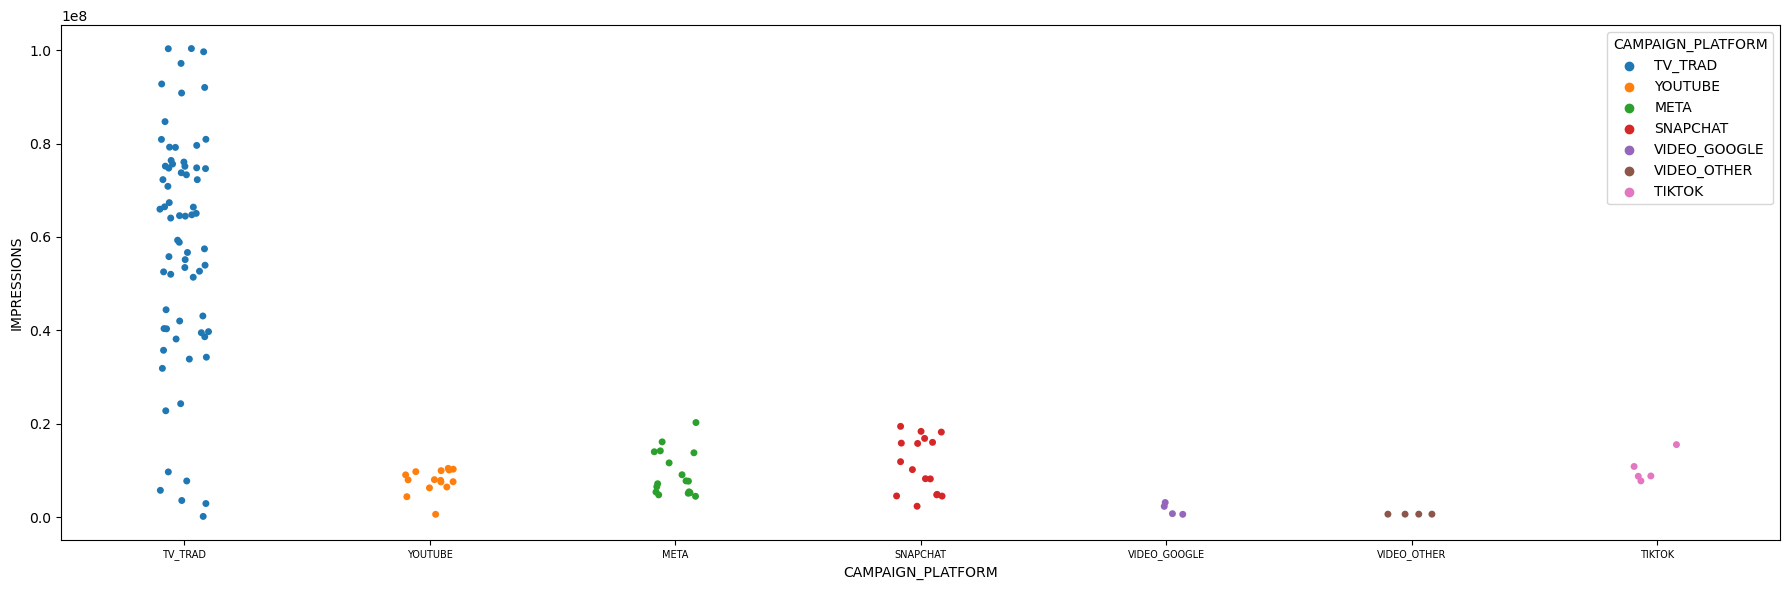

In [28]:
# These plots are useful when you have categorical data points along one axis and numerical data along the other.
    # Set custom plot parameters
plt.rcParams["figure.figsize"] = (18, 6)
plt.rcParams["xtick.labelsize"] = 7
sns.stripplot(data=media_df, x="CAMPAIGN_PLATFORM", y="IMPRESSIONS", legend=True,hue="CAMPAIGN_PLATFORM")
plt.tight_layout()
plt.show()

From the above strip plot we can observe that maximum SPEND was done in TV_TRAD 

There are 7 platforms on which campaigns were run **'TV_TRAD'**, **'YOUTUBE'**, **'SNAPCHAT'**, **'META'**, **'VIDEO_GOOGLE'**, **'VIDEO_OTHER'**, **'TIKTOK'**

In [29]:
def plot_data_distribution(data, col):
    # Set custom plot parameters
    plt.rcParams["figure.figsize"] = (18, 6)
    plt.rcParams["xtick.labelsize"] = 7
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

    # Plot the first subplot (histplot with stacked bars)
    sns.histplot(data=data, x=col, hue="CAMPAIGN_PLATFORM", multiple="stack", ax=axes[0])
    axes[0].set_title("Stacked Bars Histplot")

    # Plot the second subplot (histplot with dodge bars)
    sns.histplot(data=data, x=col, hue="CAMPAIGN_PLATFORM", multiple="dodge", ax=axes[1])
    axes[1].set_title("Dodge Bars Histplot")
    
    # Plot the third subplot (kdeplot)
    for platform in data["CAMPAIGN_PLATFORM"].unique():
        sns.kdeplot(data=data[data["CAMPAIGN_PLATFORM"] == platform], x=col, ax=axes[2], label=platform)
    axes[2].set_title("KDEplot")
    axes[2].legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


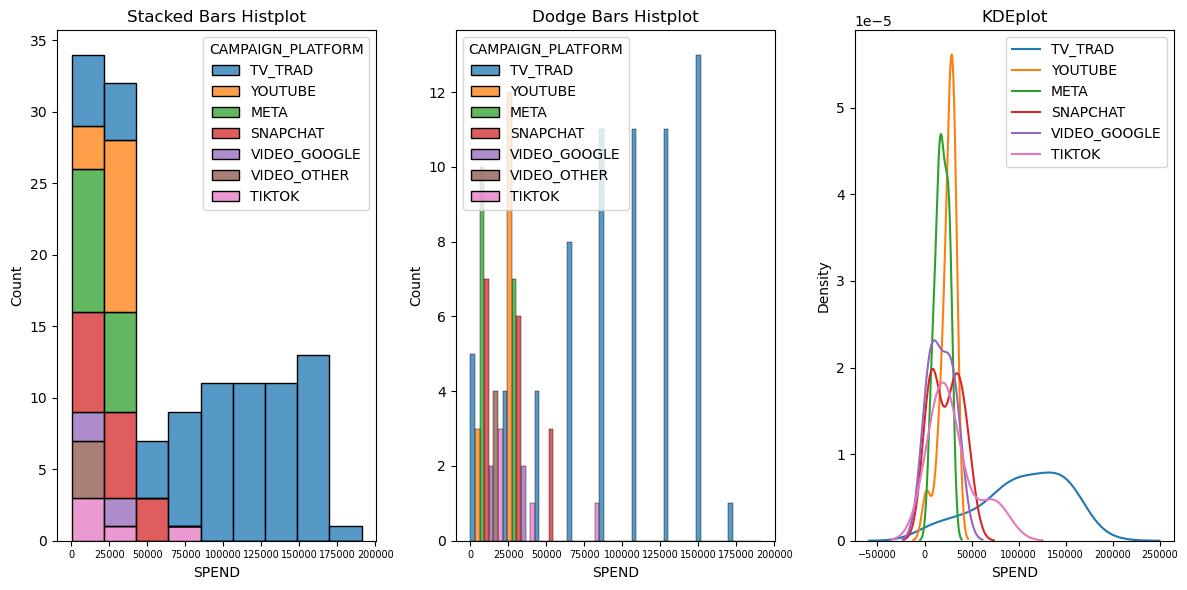

In [30]:
plot_data_distribution(media_df,"SPEND")

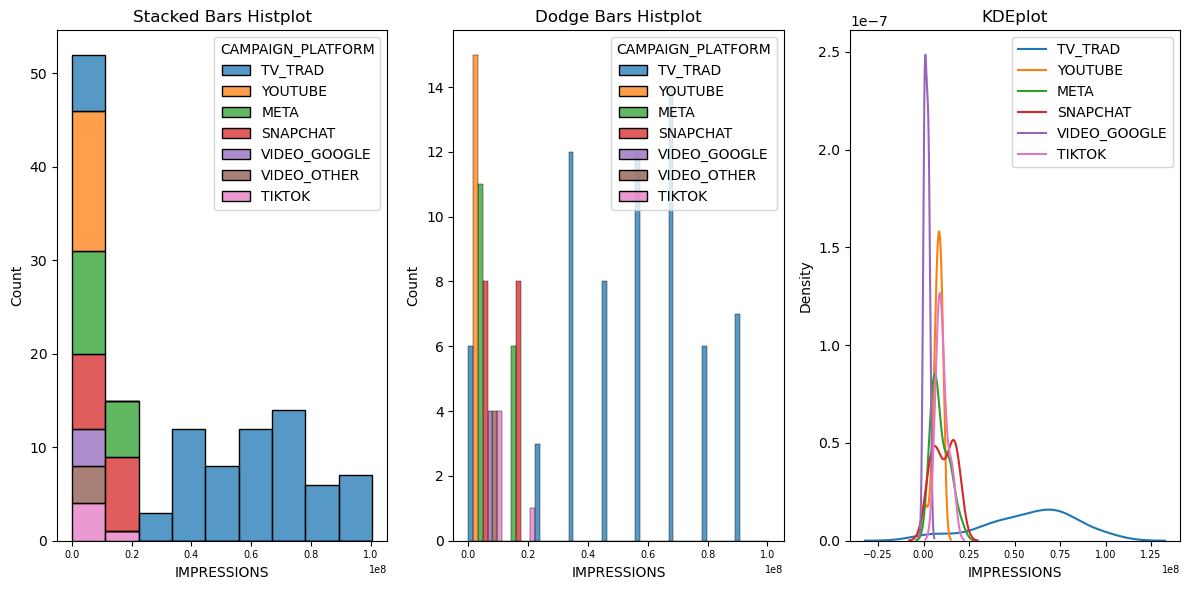

In [31]:
plot_data_distribution(media_df,"IMPRESSIONS")

For both SPEND and IMPRESSIONS , the distribution seems to be normally distributed but left sckewed except for TV_TRAD

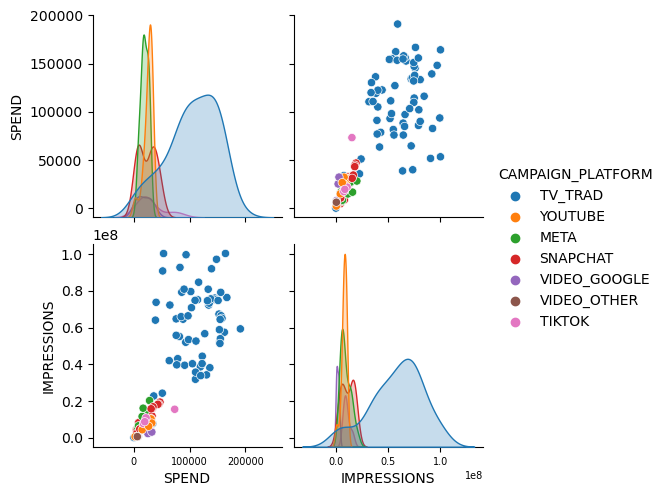

In [32]:
#Let's summarize the campaign data using a pair plot
sns.pairplot(media_df,hue="CAMPAIGN_PLATFORM")


From the above scatter plot we can say that there is a linear realationship between SPEND and IMPRESSIONS i.e increasing SPEND on campaign increases the IMPRESSIONS and vice versa

In [33]:
# we can check for any combination of WEEK and CAMPAIGN_PLATFORM if the count is > 1
(media_df[['WEEK','CAMPAIGN_PLATFORM']].value_counts() > 1).any()

False

From shape and unique weeks difference in counts we can say that the week are unique but at a campaign platform level so week need to pivot it to get SPEND and IMPRESSIONS for each platform as column at week level

In [34]:
media_df = media_df.pivot(index=['WEEK'],columns='CAMPAIGN_PLATFORM',values=['IMPRESSIONS','SPEND'])

In [35]:
media_df.head()

IMPRESSIONS                                             \
CAMPAIGN_PLATFORM        META SNAPCHAT TIKTOK       TV_TRAD VIDEO_GOOGLE   
WEEK                                                                       
2018-02-04                NaN      NaN    NaN 39,484,535.50          NaN   
2018-03-09                NaN      NaN    NaN 24,276,816.00          NaN   
2018-03-19                NaN      NaN    NaN 44,403,367.50          NaN   
2018-03-26                NaN      NaN    NaN 38,621,756.50          NaN   
2018-04-06                NaN      NaN    NaN 22,759,515.00          NaN   

                                      SPEND                             \
CAMPAIGN_PLATFORM VIDEO_OTHER YOUTUBE  META SNAPCHAT TIKTOK    TV_TRAD   
WEEK                                                                     
2018-02-04                NaN     NaN   NaN      NaN    NaN  91,080.00   
2018-03-09                NaN     NaN   NaN      NaN    NaN  50,988.00   
2018-03-19                NaN     NaN   NaN      NaN    NaN 122,638.00   
2018-03-26                NaN     NaN   NaN      NaN    NaN 119,202.00   
2018-04-06                NaN     NaN   NaN      NaN    NaN  35,611.00   

                                                    
CAMPAIGN_PLATFORM VIDEO_GOOGLE VIDEO_OTHER YOUTUBE  
WEEK                                                
2018-02-04                 NaN         NaN     NaN  
2018-03-09                 NaN         NaN     NaN  
2018-03-19                 NaN         NaN     NaN  
2018-03-26                 NaN         NaN     NaN  
2018-04-06                 NaN         NaN     NaN

In [36]:
# adding campaign platform as prefix for SPEND and IMPRESSIONS
media_df.columns = ['_'.join(col).strip() for col in media_df.columns.values]

In [37]:
media_df = media_df.reset_index()

In [38]:
media_df.head()

,WEEK,IMPRESSIONS_META,IMPRESSIONS_SNAPCHAT,IMPRESSIONS_TIKTOK,IMPRESSIONS_TV_TRAD,IMPRESSIONS_VIDEO_GOOGLE,IMPRESSIONS_VIDEO_OTHER,IMPRESSIONS_YOUTUBE,SPEND_META,SPEND_SNAPCHAT,SPEND_TIKTOK,SPEND_TV_TRAD,SPEND_VIDEO_GOOGLE,SPEND_VIDEO_OTHER,SPEND_YOUTUBE
0,2018-02-04,NaN,NaN,NaN,"39,484,535.50",NaN,NaN,NaN,NaN,NaN,NaN,"91,080.00",NaN,NaN,NaN
1,2018-03-09,NaN,NaN,NaN,"24,276,816.00",NaN,NaN,NaN,NaN,NaN,NaN,"50,988.00",NaN,NaN,NaN
2,2018-03-19,NaN,NaN,NaN,"44,403,367.50",NaN,NaN,NaN,NaN,NaN,NaN,"122,638.00",NaN,NaN,NaN
3,2018-03-26,NaN,NaN,NaN,"38,621,756.50",NaN,NaN,NaN,NaN,NaN,NaN,"119,202.00",NaN,NaN,NaN
4,2018-04-06,NaN,NaN,NaN,"22,759,515.00",NaN,NaN,NaN,NaN,NaN,NaN,"35,611.00",NaN,NaN,NaN


**All the NaNs  indicates that campaign was not active for that week , so we can impute the value of SPEND and IMPRESSION with 0**

In [39]:
media_df.fillna(0,inplace=True)

We will merge sales,trade and media data to get the final df

In [40]:
final_df = trade_df.merge(media_df,on=['WEEK'],how='left').merge(sales_df,on=['WEEK','BRAND','SUB_BRAND'],how='left')

We took the 'left' join to prevent any data loss.

In [41]:
final_df.isna().sum()

WEEK                                           0
BRAND                                          0
SUB_BRAND                                      0
AVG_PRICE_COMPETITOR                           0
AVG_PRICE_FOR_VOLUME                           0
DORITOS_170G_AVG_PRICE                         0
DORITOS_170G_AVG_PRICE_REDUCTION               0
DORITOS_230G_AVG_PRICE                         0
DORITOS_230G_AVG_PRICE_REDUCTION               0
INTERNAL_COMPETITION_AVG_PRICE                 0
INTERNAL_TDP_COMPETITION                       0
TDP_COMPETITOR                                 0
TOTAL_DISTRIBUTION_POINTS                      0
TOTAL_DISTRIBUTION_WEIGHTED_VOLUME             0
WEIGHTED_DISTRIBUTION_DISPLAY                  0
WEIGHTED_DISTRIBUTION_FEATURE                  0
WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY      0
IMPRESSIONS_META                             143
IMPRESSIONS_SNAPCHAT                         143
IMPRESSIONS_TIKTOK                           143
IMPRESSIONS_TV_TRAD 

We can observe that the weeks for which campaign was not run has NULLs in IMPRESSIONS and SPEND , so we'll impute it with 0

In [42]:
final_df.fillna(0,inplace=True)

In [43]:
final_df.shape # 209 records and 35 variables

(209, 35)

we finally have 209 weeks or 4 years of data in the final dataset

**Let's analyze the weekly sales trend**

In [44]:
final_df.columns

Index(['WEEK', 'BRAND', 'SUB_BRAND', 'AVG_PRICE_COMPETITOR',
       'AVG_PRICE_FOR_VOLUME', 'DORITOS_170G_AVG_PRICE',
       'DORITOS_170G_AVG_PRICE_REDUCTION', 'DORITOS_230G_AVG_PRICE',
       'DORITOS_230G_AVG_PRICE_REDUCTION', 'INTERNAL_COMPETITION_AVG_PRICE',
       'INTERNAL_TDP_COMPETITION', 'TDP_COMPETITOR',
       'TOTAL_DISTRIBUTION_POINTS', 'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME',
       'WEIGHTED_DISTRIBUTION_DISPLAY', 'WEIGHTED_DISTRIBUTION_FEATURE',
       'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY', 'IMPRESSIONS_META',
       'IMPRESSIONS_SNAPCHAT', 'IMPRESSIONS_TIKTOK', 'IMPRESSIONS_TV_TRAD',
       'IMPRESSIONS_VIDEO_GOOGLE', 'IMPRESSIONS_VIDEO_OTHER',
       'IMPRESSIONS_YOUTUBE', 'SPEND_META', 'SPEND_SNAPCHAT', 'SPEND_TIKTOK',
       'SPEND_TV_TRAD', 'SPEND_VIDEO_GOOGLE', 'SPEND_VIDEO_OTHER',
       'SPEND_YOUTUBE', 'VALUE_SALES', 'VALUE_SALES_SCALED', 'VOLUME_SALES',
       'VOLUME_SALES_SCALED'],
      dtype='object')

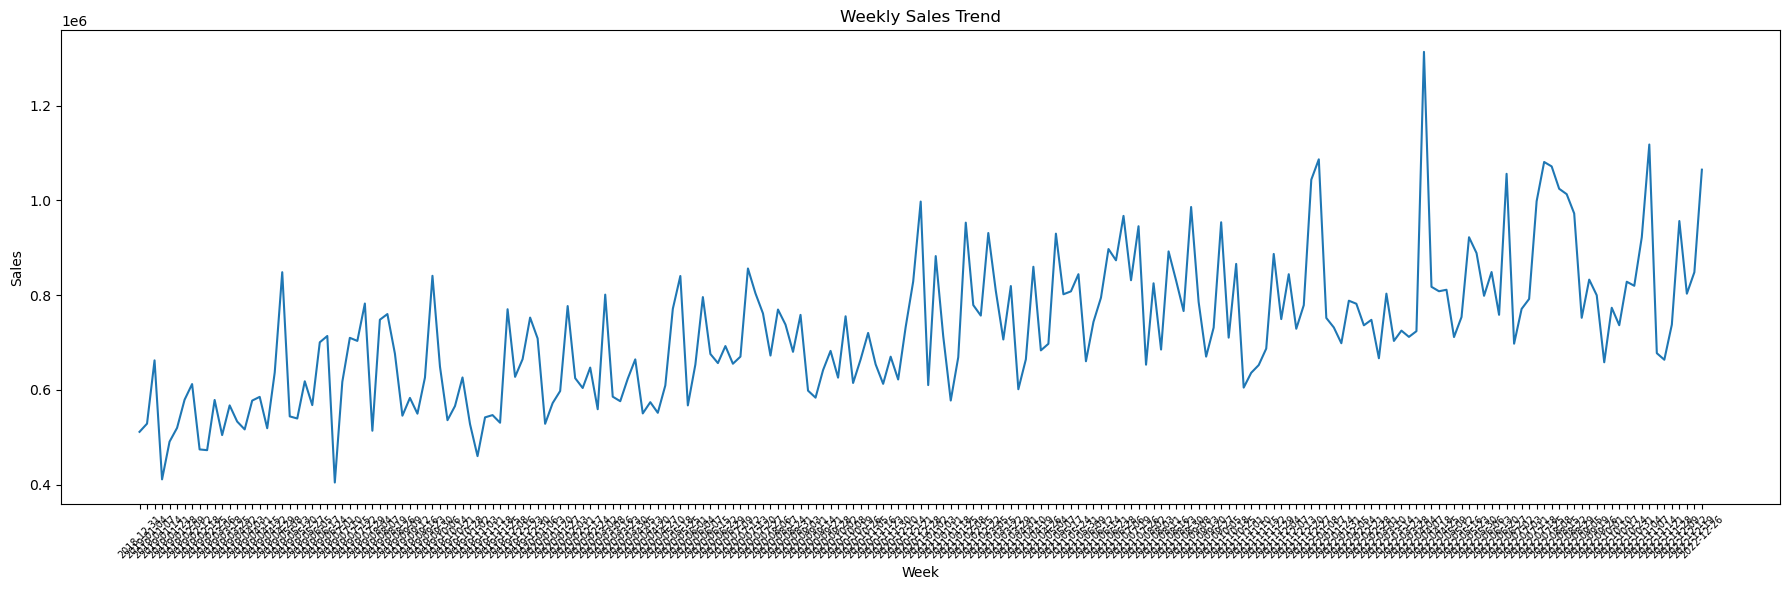

In [45]:
# Create a line plot
sns.lineplot(data=final_df, x='WEEK', y='VALUE_SALES')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

From above line plot we can observe that there is a variation in sales , there is a huge spike in month of April for year
2022

**Let's analyze the relationship between Sales and Average Price and Sales and Distribution Points**

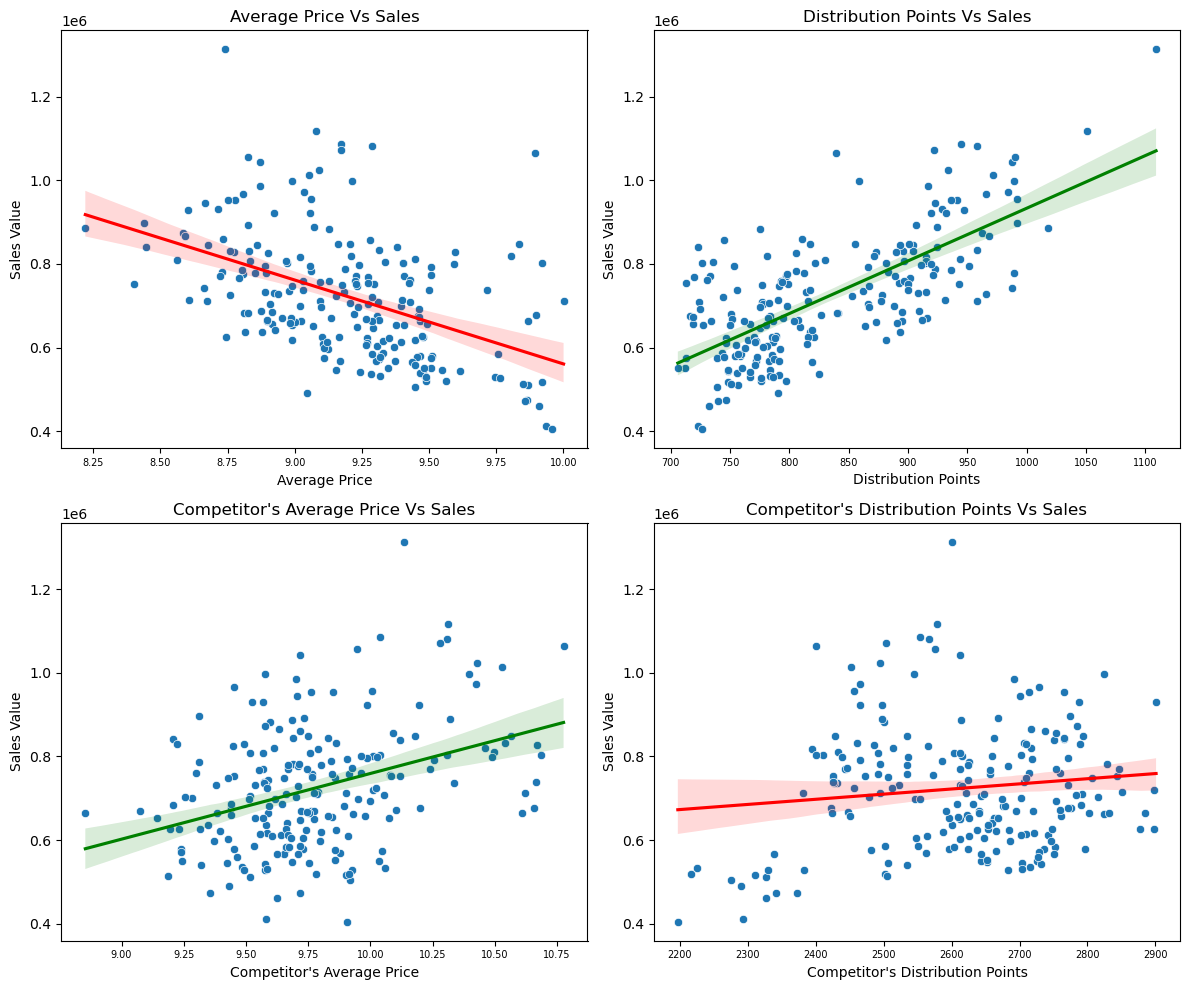

In [46]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the first scatter plot with a trend line
sns.scatterplot(data=final_df, x='AVG_PRICE_FOR_VOLUME', y='VALUE_SALES', ax=axes[0, 0])
sns.regplot(data=final_df, x='AVG_PRICE_FOR_VOLUME', y='VALUE_SALES', ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_xlabel("Average Price")
axes[0, 0].set_ylabel("Sales Value")
axes[0, 0].set_title('Average Price Vs Sales')

# Create the second scatter plot with a trend line
sns.scatterplot(data=final_df, x='TOTAL_DISTRIBUTION_POINTS', y='VALUE_SALES', ax=axes[0, 1])
sns.regplot(data=final_df, x='TOTAL_DISTRIBUTION_POINTS', y='VALUE_SALES', ax=axes[0, 1], scatter=False, color='green')
axes[0, 1].set_xlabel("Distribution Points")
axes[0, 1].set_ylabel("Sales Value")
axes[0, 1].set_title('Distribution Points Vs Sales')

# Create the third scatter plot with a trend line
sns.scatterplot(data=final_df, x='AVG_PRICE_COMPETITOR', y='VALUE_SALES', ax=axes[1, 0])
sns.regplot(data=final_df, x='AVG_PRICE_COMPETITOR', y='VALUE_SALES', ax=axes[1, 0], scatter=False, color='green')
axes[1, 0].set_xlabel("Competitor's Average Price")
axes[1, 0].set_ylabel("Sales Value")
axes[1, 0].set_title("Competitor's Average Price Vs Sales")

# Create the fourth scatter plot with a trend line
sns.scatterplot(data=final_df, x='TDP_COMPETITOR', y='VALUE_SALES', ax=axes[1, 1])
sns.regplot(data=final_df, x='TDP_COMPETITOR', y='VALUE_SALES', ax=axes[1, 1], scatter=False, color='red')
axes[1, 1].set_xlabel("Competitor's Distribution Points")
axes[1, 1].set_ylabel("Sales Value")
axes[1, 1].set_title("Competitor's Distribution Points Vs Sales")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


From above **Average Price Vs Sales** scatter plot , we can see that with increase in average price the sales generally decreases ,which makes sense in our day to day life as well.

Also from **Distribution Point Vs Sales** scatter plot , we can see that with increase in number of distribution points        the sales generally increases

From **Competitor's Average Price Vs Sales** we can observe that if the average price of competitor's product increses , the sales value increase 

Also if the competitor's total distribution points increses it impacts the sales **negatively**

In [47]:
#check datatypes of each fields
final_df.dtypes

WEEK                                          object
BRAND                                         object
SUB_BRAND                                     object
AVG_PRICE_COMPETITOR                         float64
AVG_PRICE_FOR_VOLUME                         float64
DORITOS_170G_AVG_PRICE                       float64
DORITOS_170G_AVG_PRICE_REDUCTION             float64
DORITOS_230G_AVG_PRICE                       float64
DORITOS_230G_AVG_PRICE_REDUCTION             float64
INTERNAL_COMPETITION_AVG_PRICE               float64
INTERNAL_TDP_COMPETITION                     float64
TDP_COMPETITOR                               float64
TOTAL_DISTRIBUTION_POINTS                    float64
TOTAL_DISTRIBUTION_WEIGHTED_VOLUME           float64
WEIGHTED_DISTRIBUTION_DISPLAY                float64
WEIGHTED_DISTRIBUTION_FEATURE                float64
WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY    float64
IMPRESSIONS_META                             float64
IMPRESSIONS_SNAPCHAT                         f

In [48]:
final_df.isnull().sum() 

WEEK                                         0
BRAND                                        0
SUB_BRAND                                    0
AVG_PRICE_COMPETITOR                         0
AVG_PRICE_FOR_VOLUME                         0
DORITOS_170G_AVG_PRICE                       0
DORITOS_170G_AVG_PRICE_REDUCTION             0
DORITOS_230G_AVG_PRICE                       0
DORITOS_230G_AVG_PRICE_REDUCTION             0
INTERNAL_COMPETITION_AVG_PRICE               0
INTERNAL_TDP_COMPETITION                     0
TDP_COMPETITOR                               0
TOTAL_DISTRIBUTION_POINTS                    0
TOTAL_DISTRIBUTION_WEIGHTED_VOLUME           0
WEIGHTED_DISTRIBUTION_DISPLAY                0
WEIGHTED_DISTRIBUTION_FEATURE                0
WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY    0
IMPRESSIONS_META                             0
IMPRESSIONS_SNAPCHAT                         0
IMPRESSIONS_TIKTOK                           0
IMPRESSIONS_TV_TRAD                          0
IMPRESSIONS_V

In [49]:
final_df.describe() #descriptive summary of the variables

,AVG_PRICE_COMPETITOR,AVG_PRICE_FOR_VOLUME,DORITOS_170G_AVG_PRICE,DORITOS_170G_AVG_PRICE_REDUCTION,DORITOS_230G_AVG_PRICE,DORITOS_230G_AVG_PRICE_REDUCTION,INTERNAL_COMPETITION_AVG_PRICE,INTERNAL_TDP_COMPETITION,TDP_COMPETITOR,TOTAL_DISTRIBUTION_POINTS,...,SPEND_SNAPCHAT,SPEND_TIKTOK,SPEND_TV_TRAD,SPEND_VIDEO_GOOGLE,SPEND_VIDEO_OTHER,SPEND_YOUTUBE,VALUE_SALES,VALUE_SALES_SCALED,VOLUME_SALES,VOLUME_SALES_SCALED
count,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,...,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00
mean,9.77,9.19,9.48,1.00,8.96,1.00,0.00,0.00,"2,610.91",833.45,...,"1,786.14",723.99,"27,179.05",339.73,117.68,"1,801.78","723,498.28","1,332,111.04","79,114.07","145,755.82"
std,0.35,0.34,0.26,0.01,0.51,0.03,0.00,0.00,146.97,83.03,...,"7,492.91","5,711.01","52,984.97","2,890.63",844.49,"6,831.43","147,826.65","311,055.48","17,647.19","36,773.15"
min,8.85,8.22,8.76,0.96,7.42,0.92,0.00,0.00,"2,197.00",706.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"404,800.00","511,670.00","40,650.00","51,850.00"
25%,9.57,8.93,9.28,0.99,8.58,0.98,0.00,0.00,"2,502.00",767.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"617,250.00","1,098,753.24","66,260.00","118,538.35"
50%,9.72,9.21,9.46,1.00,9.10,1.00,0.00,0.00,"2,625.00",809.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"710,380.00","1,305,649.85","77,450.00","143,372.99"
75%,9.95,9.41,9.66,1.01,9.19,1.01,0.00,0.00,"2,718.00",902.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"803,890.00","1,522,659.13","88,950.00","167,805.75"
max,10.78,10.00,10.09,1.05,10.02,1.13,0.00,0.00,"2,901.00","1,109.00",...,"46,754.00","73,192.20","191,021.00","32,190.40","6,148.80","32,120.10","1,313,150.00","2,567,930.48","150,220.00","293,762.72"


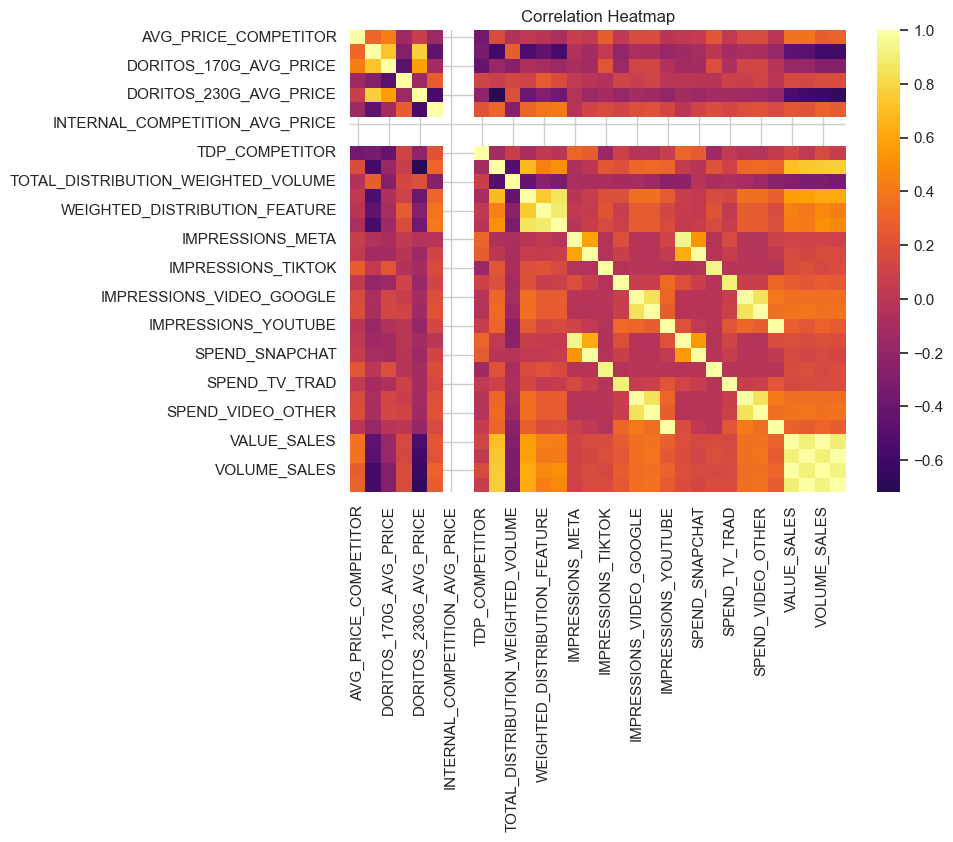

In [50]:
sns.set(style="whitegrid")

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(final_df.corr(), annot=False, cmap="inferno", center=0)
plt.title("Correlation Heatmap")
plt.show()


Here we can see that corellation for **'INTERNAL_COMPETITION_AVG_PRICE'** and **INTERNAL_TDP_COMPETITION** correlation is not defined, let's examine the root cause

In [51]:
final_df[['INTERNAL_COMPETITION_AVG_PRICE','INTERNAL_TDP_COMPETITION']].value_counts()

INTERNAL_COMPETITION_AVG_PRICE  INTERNAL_TDP_COMPETITION
0.00                            0.00                        209
dtype: int64

In [52]:
final_df.columns

Index(['WEEK', 'BRAND', 'SUB_BRAND', 'AVG_PRICE_COMPETITOR',
       'AVG_PRICE_FOR_VOLUME', 'DORITOS_170G_AVG_PRICE',
       'DORITOS_170G_AVG_PRICE_REDUCTION', 'DORITOS_230G_AVG_PRICE',
       'DORITOS_230G_AVG_PRICE_REDUCTION', 'INTERNAL_COMPETITION_AVG_PRICE',
       'INTERNAL_TDP_COMPETITION', 'TDP_COMPETITOR',
       'TOTAL_DISTRIBUTION_POINTS', 'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME',
       'WEIGHTED_DISTRIBUTION_DISPLAY', 'WEIGHTED_DISTRIBUTION_FEATURE',
       'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY', 'IMPRESSIONS_META',
       'IMPRESSIONS_SNAPCHAT', 'IMPRESSIONS_TIKTOK', 'IMPRESSIONS_TV_TRAD',
       'IMPRESSIONS_VIDEO_GOOGLE', 'IMPRESSIONS_VIDEO_OTHER',
       'IMPRESSIONS_YOUTUBE', 'SPEND_META', 'SPEND_SNAPCHAT', 'SPEND_TIKTOK',
       'SPEND_TV_TRAD', 'SPEND_VIDEO_GOOGLE', 'SPEND_VIDEO_OTHER',
       'SPEND_YOUTUBE', 'VALUE_SALES', 'VALUE_SALES_SCALED', 'VOLUME_SALES',
       'VOLUME_SALES_SCALED'],
      dtype='object')

In [53]:
categorical_features = ['BRAND','SUB_BRAND']                                     

In [54]:
for col in categorical_features:
    print(f'Unique values in {col} are' ,final_df[col].unique())

Unique values in BRAND are ['doritos']
Unique values in SUB_BRAND are ['doritos']


## Feature Selection

From our EDA ,
* 'INTERNAL_COMPETITION_AVG_PRICE','INTERNAL_TDP_COMPETITION' contains zeros
* 'CAMPAIGN_JOIN','CAMPAIGN' contains same values so we can drop either of them 
* 'BRAND','SUB_BRAND', 'MEDIA_SOURCE_SUB_BRAND_CODE' contains the single value so we can drop all of them

In [55]:
final_df = final_df.drop(['INTERNAL_COMPETITION_AVG_PRICE','INTERNAL_TDP_COMPETITION','BRAND','SUB_BRAND'],axis=1)

In [56]:
final_df.sort_values(by=['WEEK'],inplace=True)

In [57]:
price_vars = ['AVG_PRICE_COMPETITOR', 'AVG_PRICE_FOR_VOLUME',
       'DORITOS_170G_AVG_PRICE', 'DORITOS_170G_AVG_PRICE_REDUCTION',
       'DORITOS_230G_AVG_PRICE', 'DORITOS_230G_AVG_PRICE_REDUCTION']

For Price related variable , log(price) is generally preffered

In [58]:
for col in price_vars:
    final_df[col] = final_df[col].apply(lambda x : np.log(x))

In [59]:
#final_df_org = final_df.copy(deep=True)

In [60]:
#final_df=  final_df_org.copy(deep=True)

In [61]:
final_df.head()

,WEEK,AVG_PRICE_COMPETITOR,AVG_PRICE_FOR_VOLUME,DORITOS_170G_AVG_PRICE,DORITOS_170G_AVG_PRICE_REDUCTION,DORITOS_230G_AVG_PRICE,DORITOS_230G_AVG_PRICE_REDUCTION,TDP_COMPETITOR,TOTAL_DISTRIBUTION_POINTS,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,...,SPEND_SNAPCHAT,SPEND_TIKTOK,SPEND_TV_TRAD,SPEND_VIDEO_GOOGLE,SPEND_VIDEO_OTHER,SPEND_YOUTUBE,VALUE_SALES,VALUE_SALES_SCALED,VOLUME_SALES,VOLUME_SALES_SCALED
0,2018-12-31,2.25,2.29,2.29,-0.01,2.30,-0.02,"2,327.00",757.00,62.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"511,670.00","511,670.00","51,850.00","51,850.00"
1,2019-01-04,2.30,2.28,2.28,-0.00,2.30,-0.03,"2,383.00",767.00,64.93,...,0.00,0.00,0.00,0.00,0.00,0.00,"528,980.00","948,990.12","54,280.00","97,378.32"
2,2019-01-07,2.30,2.25,2.28,-0.02,2.23,-0.02,"2,825.00",786.00,59.73,...,0.00,0.00,"134,125.00",0.00,0.00,0.00,"662,480.00","1,188,489.12","69,970.00","125,526.18"
3,2019-01-14,2.26,2.30,2.29,-0.01,2.30,-0.02,"2,293.00",723.00,65.66,...,0.00,0.00,0.00,0.00,0.00,0.00,"411,470.00","738,177.18","41,420.00","74,307.48"
4,2019-01-21,2.24,2.20,2.29,-0.01,2.30,-0.02,"2,290.00",790.00,57.23,...,0.00,0.00,0.00,0.00,0.00,0.00,"491,000.00","880,854.00","54,270.00","97,360.38"


In [62]:
def adstocking(adstock_rate, media_var):
    adstocked_media = []
    for i in range(len(media_var)):
        if i == 0:
            adstocked_media.append(media_var[i])
        else:
            adstocked_media.append(media_var[i] + adstock_rate * adstocked_media[i-1])
    return adstocked_media

In [63]:
final_df['SPEND_TV_TRAD'] = adstocking(0.05,final_df['SPEND_TV_TRAD'])

In [64]:
final_df.head()

,WEEK,AVG_PRICE_COMPETITOR,AVG_PRICE_FOR_VOLUME,DORITOS_170G_AVG_PRICE,DORITOS_170G_AVG_PRICE_REDUCTION,DORITOS_230G_AVG_PRICE,DORITOS_230G_AVG_PRICE_REDUCTION,TDP_COMPETITOR,TOTAL_DISTRIBUTION_POINTS,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,...,SPEND_SNAPCHAT,SPEND_TIKTOK,SPEND_TV_TRAD,SPEND_VIDEO_GOOGLE,SPEND_VIDEO_OTHER,SPEND_YOUTUBE,VALUE_SALES,VALUE_SALES_SCALED,VOLUME_SALES,VOLUME_SALES_SCALED
0,2018-12-31,2.25,2.29,2.29,-0.01,2.30,-0.02,"2,327.00",757.00,62.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"511,670.00","511,670.00","51,850.00","51,850.00"
1,2019-01-04,2.30,2.28,2.28,-0.00,2.30,-0.03,"2,383.00",767.00,64.93,...,0.00,0.00,0.00,0.00,0.00,0.00,"528,980.00","948,990.12","54,280.00","97,378.32"
2,2019-01-07,2.30,2.25,2.28,-0.02,2.23,-0.02,"2,825.00",786.00,59.73,...,0.00,0.00,"134,125.00",0.00,0.00,0.00,"662,480.00","1,188,489.12","69,970.00","125,526.18"
3,2019-01-14,2.26,2.30,2.29,-0.01,2.30,-0.02,"2,293.00",723.00,65.66,...,0.00,0.00,"6,706.25",0.00,0.00,0.00,"411,470.00","738,177.18","41,420.00","74,307.48"
4,2019-01-21,2.24,2.20,2.29,-0.01,2.30,-0.02,"2,290.00",790.00,57.23,...,0.00,0.00,335.31,0.00,0.00,0.00,"491,000.00","880,854.00","54,270.00","97,360.38"


### Adding holiday data to capture the bump up in sales due to festive events

In [65]:
def is_holiday_within_week(from_date, holiday_list):
    # Convert date strings to datetime objects
    from_date = datetime.strptime(from_date, "%Y-%m-%d")
    week_start = from_date - timedelta(days=from_date.weekday())  # Start of the week
    week_end = week_start + timedelta(days=6)  # End of the week
    
    week_start_date = week_start.date()
    week_end_date = week_end.date()
    

    for holiday_date in holiday_list:
        if week_start_date <= holiday_date <= week_end_date:
            return 1

    return 0

In [66]:
# Years for which you want to get holiday lists
years = [2018, 2019, 2020, 2021, 2022]
final_holiday_list = []
# Get holiday lists for each year in France
fr_holidays_by_year = {year: holidays.France(years=year) for year in years}

# Print the holiday lists for each year
for year, holiday_list in fr_holidays_by_year.items():
    for holiday in holiday_list:
        final_holiday_list.append(holiday)

In [67]:
final_df['IS_HOLIDAY'] = final_df['WEEK'].apply(lambda date : is_holiday_within_week(date,final_holiday_list) )

In [68]:
final_df.head()

,WEEK,AVG_PRICE_COMPETITOR,AVG_PRICE_FOR_VOLUME,DORITOS_170G_AVG_PRICE,DORITOS_170G_AVG_PRICE_REDUCTION,DORITOS_230G_AVG_PRICE,DORITOS_230G_AVG_PRICE_REDUCTION,TDP_COMPETITOR,TOTAL_DISTRIBUTION_POINTS,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,...,SPEND_TIKTOK,SPEND_TV_TRAD,SPEND_VIDEO_GOOGLE,SPEND_VIDEO_OTHER,SPEND_YOUTUBE,VALUE_SALES,VALUE_SALES_SCALED,VOLUME_SALES,VOLUME_SALES_SCALED,IS_HOLIDAY
0,2018-12-31,2.25,2.29,2.29,-0.01,2.30,-0.02,"2,327.00",757.00,62.00,...,0.00,0.00,0.00,0.00,0.00,"511,670.00","511,670.00","51,850.00","51,850.00",1
1,2019-01-04,2.30,2.28,2.28,-0.00,2.30,-0.03,"2,383.00",767.00,64.93,...,0.00,0.00,0.00,0.00,0.00,"528,980.00","948,990.12","54,280.00","97,378.32",1
2,2019-01-07,2.30,2.25,2.28,-0.02,2.23,-0.02,"2,825.00",786.00,59.73,...,0.00,"134,125.00",0.00,0.00,0.00,"662,480.00","1,188,489.12","69,970.00","125,526.18",0
3,2019-01-14,2.26,2.30,2.29,-0.01,2.30,-0.02,"2,293.00",723.00,65.66,...,0.00,"6,706.25",0.00,0.00,0.00,"411,470.00","738,177.18","41,420.00","74,307.48",0
4,2019-01-21,2.24,2.20,2.29,-0.01,2.30,-0.02,"2,290.00",790.00,57.23,...,0.00,335.31,0.00,0.00,0.00,"491,000.00","880,854.00","54,270.00","97,360.38",0


In [69]:
final_df.columns

Index(['WEEK', 'AVG_PRICE_COMPETITOR', 'AVG_PRICE_FOR_VOLUME',
       'DORITOS_170G_AVG_PRICE', 'DORITOS_170G_AVG_PRICE_REDUCTION',
       'DORITOS_230G_AVG_PRICE', 'DORITOS_230G_AVG_PRICE_REDUCTION',
       'TDP_COMPETITOR', 'TOTAL_DISTRIBUTION_POINTS',
       'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME', 'WEIGHTED_DISTRIBUTION_DISPLAY',
       'WEIGHTED_DISTRIBUTION_FEATURE',
       'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY', 'IMPRESSIONS_META',
       'IMPRESSIONS_SNAPCHAT', 'IMPRESSIONS_TIKTOK', 'IMPRESSIONS_TV_TRAD',
       'IMPRESSIONS_VIDEO_GOOGLE', 'IMPRESSIONS_VIDEO_OTHER',
       'IMPRESSIONS_YOUTUBE', 'SPEND_META', 'SPEND_SNAPCHAT', 'SPEND_TIKTOK',
       'SPEND_TV_TRAD', 'SPEND_VIDEO_GOOGLE', 'SPEND_VIDEO_OTHER',
       'SPEND_YOUTUBE', 'VALUE_SALES', 'VALUE_SALES_SCALED', 'VOLUME_SALES',
       'VOLUME_SALES_SCALED', 'IS_HOLIDAY'],
      dtype='object')

From EDA we know that IMPRESSIONS and SPEND are highly correlated , so we can use only SPEND for modelling

In [70]:
features = ['AVG_PRICE_COMPETITOR', 'AVG_PRICE_FOR_VOLUME',
       'DORITOS_170G_AVG_PRICE', 'DORITOS_170G_AVG_PRICE_REDUCTION',
       'TDP_COMPETITOR', 'TOTAL_DISTRIBUTION_POINTS',
       'TOTAL_DISTRIBUTION_WEIGHTED_VOLUME', 'WEIGHTED_DISTRIBUTION_DISPLAY',
       'WEIGHTED_DISTRIBUTION_FEATURE',
       'WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY',
       'IMPRESSIONS_YOUTUBE', 'SPEND_META', 'SPEND_SNAPCHAT', 'SPEND_TIKTOK',
       'SPEND_TV_TRAD', 'SPEND_VIDEO_GOOGLE', 'SPEND_VIDEO_OTHER',
       'SPEND_YOUTUBE','IS_HOLIDAY']

In [71]:
X = final_df[features]

In [72]:
y = final_df['VALUE_SALES']

## Modelling

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Evaluation matrix - Calculate MAPE
def calculate_mape(y_true, y_pred):
    """
    The MAPE is a measure of prediction accuracy that takes an average of the differences between
    the predicted and actual model results
    
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [76]:
def calculate_adjusted_r2(r2,n,p):
    """
    Calculates the adjusted R-squared value given the R-squared, number of samples, and number of predictors.

    The adjusted R-squared value is a modified version of the R-squared value that takes into account the number
    of predictors in a regression model. It penalizes the addition of unnecessary predictors.
    """
    
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"Adjusted R Square value is: {adjusted_r2:.2f}%")

### Linear Regression

In [77]:
# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
# Predict on the test set
y_pred = regressor.predict(X_test_scaled)

In [79]:
mape_lr = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.95%


In [80]:
# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print(f"R Square value is: {r2:.2f}%")

R Square value is: 0.70%


Approximately 47% of the total variability in the dependent variable is explained by the predictor variables included in the model. 

In [81]:
n = X.shape[0]  # Number of samples
p = X.shape[1]  # Number of independent variables

In [82]:
# Calculate the Adjusted R-squared
calculate_adjusted_r2(r2,n,p)

Adjusted R Square value is: 0.67%


### Plot the best fit line

In [83]:
regressor.coef_ # these coefficient are in order of input features

array([  61064.01648358,   -5584.97660324,  -11702.43375529,
          7217.13419754,   39853.76238456,   70116.24333679,
          8740.90535983,   36866.90556853,   32286.07003202,
        -37802.31734125,  119743.51206018,     562.81697651,
          6455.23278407,  -10476.81754346,    5479.79597192,
          -130.91705346,   13950.05199327, -115056.34402156,
          3055.68351559])

A positive coefficient indicates a positive relationship between the variable and the dependent variable, while a negative coefficient indicates a negative relationship. The magnitude of the coefficient indicates the strength of the relationship.

In [84]:
price_slope = regressor.coef_[1] 

In [85]:
intercept = regressor.intercept_

In [86]:
def plot_best_fit_line(slope,intercept,feature,final_df):
    # Create scatter plot 
    plt.scatter(final_df[feature],final_df['VALUE_SALES'], label='Data Points')

    # Plot the best fit line 
    plt.plot(final_df[feature], slope * final_df[feature] + intercept, color='blue', label='Best Fit Line')

    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title('Best fit line')
    plt.legend()
    plt.show()

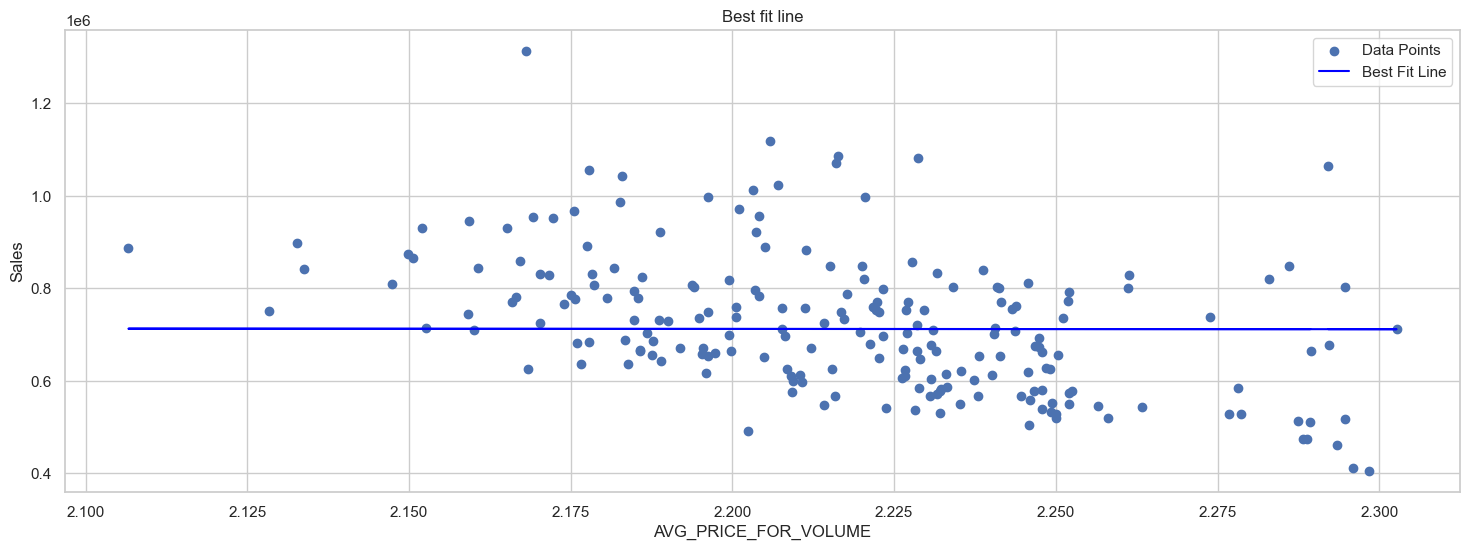

In [87]:
plot_best_fit_line(price_slope,intercept,'AVG_PRICE_FOR_VOLUME',final_df)

In [88]:
result_lr = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index(drop=True)

In [89]:
result_lr.head()

,Actual,Predicted
0,"782,330.00","719,969.90"
1,"1,313,150.00","1,174,007.54"
2,"672,620.00","770,854.17"
3,"828,290.00","944,247.76"
4,"647,240.00","715,991.86"


In [90]:
def plot_result(data):
    # Set up Seaborn style
    sns.set(style="whitegrid")

    # Create a line plot with actual, predicted, and MAPE
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, markers=True)
    plt.xlabel("Data Point")
    plt.ylabel("Value")
    plt.title("Actual vs. Predicted Values with MAPE")
    plt.legend()
    plt.tight_layout()
    plt.show()

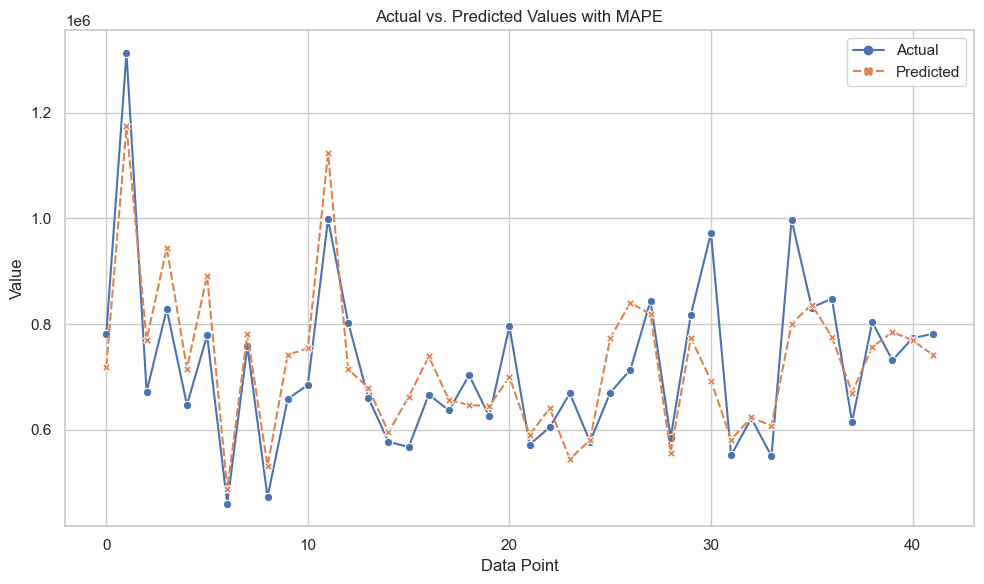

In [91]:
plot_result(result_lr)

In [92]:
# Calculating elasticity for each independent variable
# Elasticity = (% Change in Dependent Variable) / (% Change in Independent Variable)
# Elasticity = (Coefficient of Independent Variable) * (Independent Variable / Dependent Variable)

In [93]:
elasticities = regressor.coef_ * (X.mean() / y.mean())

In [94]:
# Print the elasticities
print("Elasticities:")
print(elasticities)

Elasticities:
AVG_PRICE_COMPETITOR                             0.19
AVG_PRICE_FOR_VOLUME                            -0.02
DORITOS_170G_AVG_PRICE                          -0.04
DORITOS_170G_AVG_PRICE_REDUCTION                -0.00
TDP_COMPETITOR                                 143.82
TOTAL_DISTRIBUTION_POINTS                       80.77
TOTAL_DISTRIBUTION_WEIGHTED_VOLUME               0.79
WEIGHTED_DISTRIBUTION_DISPLAY                    0.59
WEIGHTED_DISTRIBUTION_FEATURE                    0.56
WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY       -0.35
IMPRESSIONS_YOUTUBE                         91,831.73
SPEND_META                                       1.18
SPEND_SNAPCHAT                                  15.94
SPEND_TIKTOK                                   -10.48
SPEND_TV_TRAD                                  216.69
SPEND_VIDEO_GOOGLE                              -0.06
SPEND_VIDEO_OTHER                                2.27
SPEND_YOUTUBE                                 -286.53
IS_HOLIDAY    

# 
**decomposition = channel_coeff x channel_spend / total_sales** 
**incremental_sales = channel_coeff/ sum(coeff_all) x total_sales**

**roi = incremental_sales/channel_spend x100**

**contribution = incremental_sales/total_sales x 100**

Decomposition: incremental sale due to investment <br>
ROI: return on investment. For each unit spend how much incremental sales
Contribution: pct contribution of the media vehicle in over all incr sales

In [95]:
regressor

LinearRegression()

In [96]:
coeff_df = pd.DataFrame({'Features':features,'Coefficients':regressor.coef_}).reset_index(drop=True)

In [97]:
coeff_df

,Features,Coefficients
0,AVG_PRICE_COMPETITOR,"61,064.02"
1,AVG_PRICE_FOR_VOLUME,"-5,584.98"
2,DORITOS_170G_AVG_PRICE,"-11,702.43"
3,DORITOS_170G_AVG_PRICE_REDUCTION,"7,217.13"
4,TDP_COMPETITOR,"39,853.76"
5,TOTAL_DISTRIBUTION_POINTS,"70,116.24"
6,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,"8,740.91"
7,WEIGHTED_DISTRIBUTION_DISPLAY,"36,866.91"
8,WEIGHTED_DISTRIBUTION_FEATURE,"32,286.07"
9,WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY,"-37,802.32"


In [98]:
# get coeff of any particular channel
coeff_df.loc[coeff_df['Features']=='SPEND_TV_TRAD','Coefficients'].values[0]

5479.795971924134

In [99]:
decomposition_tv = coeff_df.loc[coeff_df['Features']=='SPEND_TV_TRAD','Coefficients']*final_df['SPEND_TV_TRAD'].sum()/sum(final_df['VALUE_SALES_SCALED'])

In [100]:
decomposition_tv.values[0]

117.68864153338765

In [101]:
incremental_sales = coeff_df.loc[coeff_df['Features']=='SPEND_TV_TRAD','Coefficients']/sum(coeff_df['Coefficients'])*sum(final_df['VALUE_SALES_SCALED'])

In [102]:
roi = incremental_sales/sum(final_df['SPEND_TV_TRAD'])*100

In [103]:
roi

14   113.58
Name: Coefficients, dtype: float64

In [104]:
def calculate_decom_roi_composition:
    decomposition = coeff.loc[coeff_df['Features']==channel,'Coefficients']*final_df[channel]/sum(final_df['VALUE_SALES_SCALED'])
    incremental_sales = coeff.loc[coeff_df['Features']==channel,'Coefficients']/sum(coeff_df['Coefficients'])*sum(final_df['VALUE_SALES_SCALED'])
    roi = incremental_sales/sum(final_df[channel])*100
    
    contribution == incremental_sales/sum(final_df['VALUE_SALES_SCALED'])*100
    
       # Print the values
    print("Decomposition :", decomposition.values[0])
    print("ROI:", roi.values[0])
    print("Contribution: {:.2f}%".format(contribution.values[0]))
    
    return decomposition.values[0] , roi.values[0] ,contribution.values[0]

SyntaxError: invalid syntax (2798860571.py, line 1)

In [105]:
def calculate_decom_roi_composition(channel):
    decomposition = coeff_df.loc[coeff_df['Features']==channel,'Coefficients']*final_df[channel].sum()/sum(final_df['VALUE_SALES_SCALED'])
    incremental_sales = coeff_df.loc[coeff_df['Features']==channel,'Coefficients']/sum(coeff_df['Coefficients'])*sum(final_df['VALUE_SALES_SCALED'])
    roi = incremental_sales/sum(final_df[channel])*100
    
    contribution = incremental_sales/sum(final_df['VALUE_SALES_SCALED'])*100
    
    print("Decomposition :", decomposition.values[0])
    print("ROI:", roi.values[0])
    print("Contribution: {:.2f}%".format(contribution.values[0]))
    
    return decomposition.values[0] , roi.values[0] ,contribution.values[0]

In [106]:
tv_decomp , tv_roi , tv_contribution = calculate_decom_roi_composition('SPEND_TV_TRAD')

Decomposition : 117.68864153338765
ROI: 113.58222626466711
Contribution: 2.44%


In [107]:
snap_decomp , snap_roi , snap_contribution = calculate_decom_roi_composition('SPEND_SNAPCHAT')

Decomposition : 8.655380692433557
ROI: 2143.1560322465366
Contribution: 2.87%


In [108]:
meta_decomp , meta_roi , meta_contribution = calculate_decom_roi_composition('SPEND_META')

Decomposition : 0.641724081232014
ROI: 219.73649346044564
Contribution: 0.25%


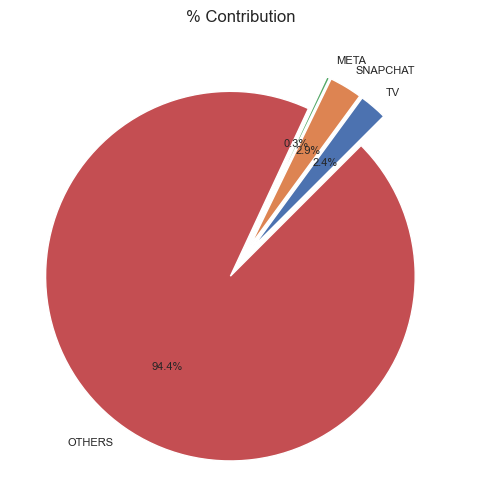

In [109]:
data = [tv_contribution, snap_contribution, meta_contribution ,  100 -(tv_contribution+snap_contribution+meta_contribution)]
labels = ['TV', 'SNAPCHAT', 'META','OTHERS']
plt.figure(figsize=(6, 6)) 
sns.set_style("whitegrid") 
explode = (0.1, 0.1, 0.1, 0.1) 
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=45, explode=explode,textprops={'fontsize': 8})
plt.title("% Contribution")
plt.show()

# Ridge Regression

In [110]:
regressor = Ridge(alpha=18,random_state=24)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

In [111]:
mape_rr = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_rr:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.42%


In [112]:
# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print(f"R Square value is: {r2:.2f}%")

R Square value is: 0.78%


In [113]:
# Calculate the Adjusted R-squared
calculate_adjusted_r2(r2,n,p)

Adjusted R Square value is: 0.76%


In [114]:
price_slope = regressor.coef_[1] 

In [115]:
intercept = regressor.intercept_

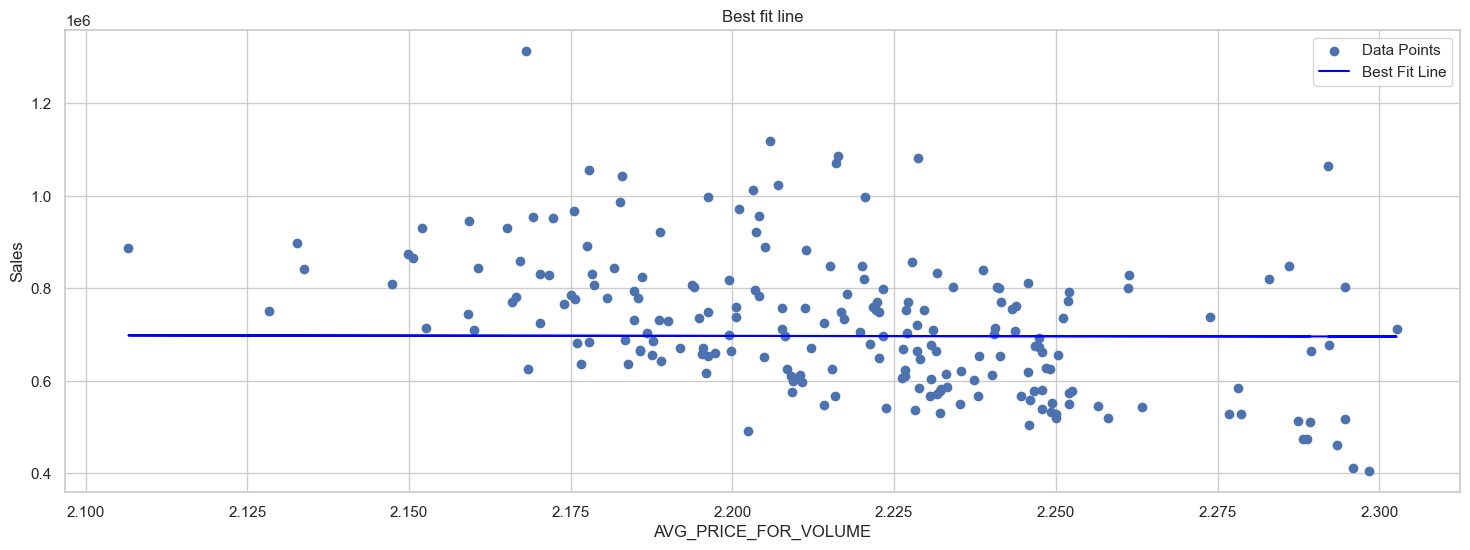

In [116]:
plot_best_fit_line(price_slope,intercept,'AVG_PRICE_FOR_VOLUME',final_df)

In [117]:
result_rr = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index(drop=True)

In [118]:
result_rr.head()

,Actual,Predicted
0,"782,330.00","749,891.52"
1,"1,313,150.00","1,203,119.69"
2,"672,620.00","765,604.41"
3,"828,290.00","883,851.38"
4,"647,240.00","713,696.81"


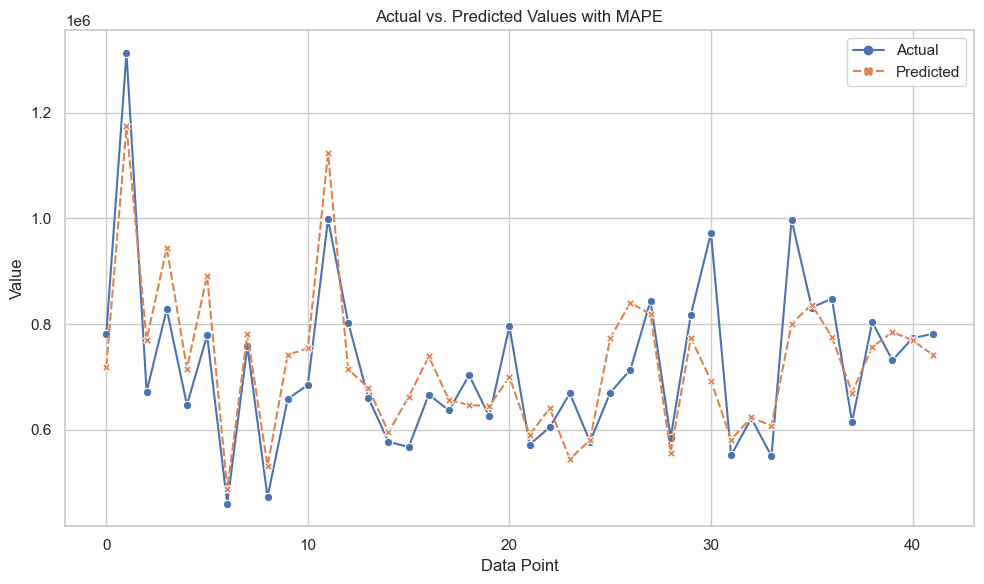

In [119]:
plot_result(result_lr)

In [120]:
regressor

Ridge(alpha=18, random_state=24)

In [121]:
coeff_df = pd.DataFrame({'Features':features,'Coefficients':regressor.coef_}).reset_index(drop=True)

In [122]:
coeff_df

,Features,Coefficients
0,AVG_PRICE_COMPETITOR,"55,133.95"
1,AVG_PRICE_FOR_VOLUME,"-12,464.03"
2,DORITOS_170G_AVG_PRICE,"-12,227.25"
3,DORITOS_170G_AVG_PRICE_REDUCTION,"7,447.52"
4,TDP_COMPETITOR,"30,089.98"
5,TOTAL_DISTRIBUTION_POINTS,"60,822.44"
6,TOTAL_DISTRIBUTION_WEIGHTED_VOLUME,"6,195.04"
7,WEIGHTED_DISTRIBUTION_DISPLAY,"23,869.54"
8,WEIGHTED_DISTRIBUTION_FEATURE,"15,149.68"
9,WEIGHTED_DISTRIBUTION_FEATURE_AND_DISPLAY,"-13,632.76"


In [123]:
def calculate_decom_roi_composition(channel):
    decomposition = coeff_df.loc[coeff_df['Features']==channel,'Coefficients']*final_df[channel].sum()/sum(final_df['VALUE_SALES_SCALED'])
    incremental_sales = coeff_df.loc[coeff_df['Features']==channel,'Coefficients']/sum(coeff_df['Coefficients'])*sum(final_df['VALUE_SALES_SCALED'])
    roi = incremental_sales/sum(final_df[channel])*100
    
    contribution = incremental_sales/sum(final_df['VALUE_SALES_SCALED'])*100
    
    print("Decomposition :", decomposition.values[0])
    print("ROI:", roi.values[0])
    print("Contribution: {:.2f}%".format(contribution.values[0]))
    
    return decomposition.values[0] , roi.values[0] ,contribution.values[0]

In [124]:
tv_decomp , tv_roi , tv_contribution = calculate_decom_roi_composition('SPEND_TV_TRAD')

Decomposition : 115.33772048589356
ROI: 127.7492046045578
Contribution: 2.74%


In [127]:
YT_decomp , YT_roi , YT_contribution = calculate_decom_roi_composition('SPEND_YOUTUBE')

Decomposition : -2.8369606549847495
ROI: -792.2433295951824
Contribution: -1.07%


In [128]:
calculate_decom_roi_composition('SPEND_TIKTOK')

Decomposition : -2.1020142590409674
ROI: -3635.5777071978764
Contribution: -1.98%


(-2.1020142590409674, -3635.5777071978764, -1.9759144000679123)

In [129]:
calculate_decom_roi_composition('SPEND_VIDEO_GOOGLE')

Decomposition : -0.2633409654246137
ROI: -2068.454838969064
Contribution: -0.53%


(-0.2633409654246137, -2068.454838969064, -0.5275283631076609)

In [125]:
snap_decomp , snap_roi , snap_contribution = calculate_decom_roi_composition('SPEND_SNAPCHAT')

Decomposition : 8.026915306225973
ROI: 2281.010641050967
Contribution: 3.06%


In [126]:
meta_decomp , meta_roi , meta_contribution = calculate_decom_roi_composition('SPEND_META')

Decomposition : 6.520669308337888
ROI: 2562.4596929874533
Contribution: 2.92%


In [ ]:
data = [tv_contribution, snap_contribution, meta_contribution ,  100 -(tv_contribution+snap_contribution+meta_contribution)]
labels = ['TV', 'SNAPCHAT', 'META','OTHERS']
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid") 
explode = (0.1, 0.1, 0.1, 0.1) 
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=45, explode=explode,textprops={'fontsize': 8})
plt.title("% Contribution")
plt.show()


In [ ]:
elasticity_df = final_df[['WEEK','AVG_PRICE_FOR_VOLUME','VOLUME_SALES']]

In [ ]:
elasticity_df['WEEK'][0].split('-')[0]

In [ ]:
elasticity_df["Year"] = elasticity_df['WEEK'].apply(lambda date : date.split('-')[0])

In [ ]:
elasticity_df.drop('WEEK',axis =1 ,inplace = True)

In [ ]:
# Grouping by year
yearly_data = elasticity_df.groupby('Year').agg({'AVG_PRICE_FOR_VOLUME': 'sum',  'VOLUME_SALES': 'sum'}).reset_index()

In [ ]:
yearly_data

In [ ]:
#percentage change in price and volume for each year
yearly_data['Pct_Change_Price'] = yearly_data['AVG_PRICE_FOR_VOLUME'].pct_change() * 100
yearly_data['Pct_Change_Volume'] = yearly_data['VOLUME_SALES'].pct_change() * 100

#Elasticity for each year
yearly_data['Elasticity'] = yearly_data['Pct_Change_Volume'] / yearly_data['Pct_Change_Price']

In [ ]:
yearly_data

In [ ]:
yearly_data = yearly_data.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
#Dataframe
print(yearly_data[['Year', 'AVG_PRICE_FOR_VOLUME', 'VOLUME_SALES', 'Elasticity']])

1. **1.27 (Elastic):** An elasticity value of 1.27 indicates that the quantity demanded or supplied is relatively responsive to changes in price. Specifically, a 1% increase in price would result in approximately a 1.27% increase in quantity demanded or supplied, and vice versa. 

   - **Interpretation:** Products or services with an elasticity of 1.27 are considered elastic. Consumers or producers are sensitive to price changes, and relatively small price changes lead to proportionally larger changes in quantity. This suggests that the market for this product may have close substitutes, and consumers can easily adjust their purchases in response to price fluctuations.

2. **-17.25 (Elastic):** An elasticity value of -17.25, which is negative, also indicates that the quantity is responsive to price changes. However, the negative sign indicates that it's an elastic good with an extreme degree of responsiveness.

   - **Interpretation:** With an elasticity of -17.25, even a small percentage increase in price would lead to a massive percentage decrease in quantity demanded or supplied. This suggests an extremely competitive market with many substitutes, and consumers are highly sensitive to price changes.

3. **-12.18 (Elastic):** Similar to the previous value, an elasticity of -12.18 is negative and indicates elasticity.

   - **Interpretation:** A value of -12.18 suggests that the quantity is highly responsive to price changes. Even small price changes result in significant changes in quantity. This is typically observed in markets with many alternatives or in situations where consumers can easily switch to other products or services.

4. **1.74 (Elastic):** An elasticity value of 1.74, like the first value, indicates that the quantity is responsive to price changes.
- **Interpretation:** With an elasticity of 1.74, a 1% change in price would lead to approximately a 1.74% change in quantity demanded or supplied. This is consistent with elastic goods, where consumers or producers are sensitive to price changes.


Linear mixed model

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
formula = 'Y ~ X1 + X2 + (1|Subject)'

In [ ]:
model = smf.mixedlm(formula, data=data, groups=data['Subject'])
result = model.fit()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
sales_df = pd.read_csv("sales.csv")

In [ ]:
sales_df = sales_df[sales_df['FEATURE']=='VALUE_SALES']

In [ ]:
sales_df 

In [ ]:
trade_df = trade_df[((trade_df['FEATURE']== 'AVG_PRICE_FOR_VOLUME') | (trade_df['FEATURE']=='AVG_PRICE_COMPETITOR'))]

In [ ]:
trade_df = pd.read_csv("trade.csv") #Store level information ,clubbed at brand level

trade_df['WEEK'] = pd.to_datetime(trade_df['WEEK']).dt.strftime('%Y-%m-%d')

In [ ]:
trade_df = trade_df.pivot(index=['WEEK','BRAND','SUB_BRAND'], columns='FEATURE', values='VALUE').reset_index().rename_axis(None, axis=1)

In [ ]:
lmm_df = trade_df.merge(media_df,on=['WEEK'],how='inner').merge(sales_df,on=['WEEK','BRAND','SUB_BRAND'],how='inner').drop(['BRAND','SUB_BRAND'],axis=1)

In [ ]:
lmm_df.shape

In [ ]:

media_df = pd.read_csv("media_spend.csv")  # Contains impressions and spend from marketing campaigns
# convert to date from datetime if it exists
media_df['WEEK'] = pd.to_datetime(media_df['WEEK']).dt.strftime('%Y-%m-%d')

In [ ]:
# Aggregate SPEND and IMPRESSIONS for each week and campaign_platform combination
media_df =media_df.groupby(['WEEK','CAMPAIGN_PLATFORM']).agg({'SPEND':'sum','IMPRESSIONS':'sum'}).reset_index()

In [ ]:
lmm_df = trade_df.merge(media_df,on=['WEEK'],how='inner').merge(sales_df,on=['WEEK','BRAND','SUB_BRAND'],how='inner').drop(['BRAND','SUB_BRAND'],axis=1)

In [ ]:
lmm_df.shape

In [ ]:
lmm_df.isna().sum()

In [ ]:
features =  ["WEEK","AVG_PRICE_COMPETITOR","AVG_PRICE_FOR_VOLUME","CAMPAIGN_PLATFORM","SPEND","IMPRESSIONS"]

In [ ]:
lmm_df.columns

**Linear Mixed models**

In [ ]:
sales_df = pd.read_csv("sales.csv")

In [ ]:
sales_df = sales_df[sales_df['FEATURE']=='VALUE_SALES']

In [ ]:
sales_df

In [ ]:
sales_df['WEEK'] = pd.to_datetime(sales_df['WEEK']).dt.strftime('%Y-%m-%d')

In [ ]:
sales_df = sales_df.pivot(index=['WEEK','BRAND','SUB_BRAND'],columns='FEATURE', values='VALUE').reset_index().rename_axis(None, axis=1)

In [ ]:
trade_df = pd.read_csv("trade.csv")
trade_df['WEEK'] = pd.to_datetime(trade_df['WEEK']).dt.strftime('%Y-%m-%d')

In [ ]:
trade_df['FEATURE'].unique()

In [ ]:
trade_df = trade_df[((trade_df['FEATURE']== 'AVG_PRICE_FOR_VOLUME') | (trade_df['FEATURE']=='AVG_PRICE_COMPETITOR'))]

In [ ]:
trade_df = trade_df.pivot(index=['WEEK','BRAND','SUB_BRAND'], columns='FEATURE', values='VALUE').reset_index().rename_axis(None, axis=1)

In [ ]:
media_df = pd.read_csv("media_spend.csv") 
media_df['WEEK'] = pd.to_datetime(media_df['WEEK']).dt.strftime('%Y-%m-%d')

In [ ]:
# Aggregating SPEND and IMPRESSIONS for each week and campaign_platform
media_df =media_df.groupby(['WEEK','CAMPAIGN_PLATFORM']).agg({'SPEND':'sum','IMPRESSIONS':'sum'}).reset_index()

In [ ]:
lmm_df = trade_df.merge(media_df,on=['WEEK'],how='inner').merge(sales_df,on=['WEEK','BRAND','SUB_BRAND'],how='inner').drop(['BRAND','SUB_BRAND'],axis=1)

In [ ]:
lmm_df.shape

In [ ]:
lmm_df.isna().sum()

In [ ]:
features =  ["WEEK","AVG_PRICE_COMPETITOR","AVG_PRICE_FOR_VOLUME","CAMPAIGN_PLATFORM","SPEND","IMPRESSIONS"]

In [ ]:
lmm_df.columns

In [ ]:
X = lmm_df[features]
y = lmm_df['VALUE_SALES']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lmm_df['WEEK'].nunique()

In [ ]:
lmm_df.columns

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Defining and fitting the Linear Mixed Model
lmm_formula = "VALUE_SALES ~ AVG_PRICE_COMPETITOR + AVG_PRICE_FOR_VOLUME + CAMPAIGN_PLATFORM + SPEND + IMPRESSIONS"

lmm_model = smf.mixedlm(lmm_formula, data=train_df,groups=train_df['WEEK'])
lmm_results = lmm_model.fit()


In [ ]:
y_pred = lmm_results.predict(exog=test_df)

In [ ]:
mape_lr = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")

In [ ]:
#R-square
r2 = r2_score(y_test, y_pred)
print(f"R Square value is: {r2:.2f}%")

In [ ]:
n = X.shape[0]
p = X.shape[1]
#Adjusted R-square
calculate_adjusted_r2(r2,n,p)

In [ ]:
#summary of the LMM results
print(lmm_results.summary())